In [1]:
#모델 학습
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

#train, test 분류
from sklearn.model_selection import train_test_split

#날짜 생성
from datetime import datetime

#그래프 생성
import matplotlib.pyplot as plt

In [2]:
target = ['affenpinscher',
'afghan_hound',
'african_hunting_dog',
'airedale',
'american_staffordshire_terrier',
'appenzeller',
'australian_terrier',
'basenji',
'basset',
'beagle',
'bedlington_terrier',
'bernese_mountain_dog',
'black-and-tan_coonhound',
'blenheim_spaniel',
'bloodhound',
'bluetick',
'border_collie',
'border_terrier',
'borzoi',
'boston_bull',
'bouvier_des_flandres',
'boxer',
'brabancon_griffon',
'briard',
'brittany_spaniel',
'bull_mastiff',
'cairn',
'cardigan',
'chesapeake_bay_retriever',
'chihuahua',
'chow',
'clumber',
'cocker_spaniel',
'collie',
'curly-coated_retriever',
'dandie_dinmont',
'dhole',
'dingo',
'doberman',
'english_foxhound',
'english_setter',
'english_springer',
'entlebucher',
'eskimo_dog',
'flat-coated_retriever',
'french_bulldog',
'german_shepherd',
'german_short-haired_pointer',
'giant_schnauzer',
'golden_retriever',
'gordon_setter',
'great_dane',
'great_pyrenees',
'greater_swiss_mountain_dog',
'groenendael',
'ibizan_hound',
'irish_setter',
'irish_terrier',
'irish_water_spaniel',
'irish_wolfhound',
'italian_greyhound',
'japanese_spaniel',
'keeshond',
'kelpie',
'kerry_blue_terrier',
'komondor',
'kuvasz',
'labrador_retriever',
'lakeland_terrier',
'leonberg',
'lhasa',
'malamute',
'malinois',
'maltese_dog',
'mexican_hairless',
'miniature_pinscher',
'miniature_poodle',
'miniature_schnauzer',
'newfoundland',
'norfolk_terrier',
'norwegian_elkhound',
'norwich_terrier',
'old_english_sheepdog',
'otterhound',
'papillon',
'pekinese',
'pembroke',
'pomeranian',
'pug',
'redbone',
'rhodesian_ridgeback',
'rottweiler',
'saint_bernard',
'saluki',
'samoyed',
'schipperke',
'scotch_terrier',
'scottish_deerhound',
'sealyham_terrier',
'shetland_sheepdog',
'shih-tzu',
'siberian_husky',
'silky_terrier',
'soft-coated_wheaten_terrier',
'staffordshire_bullterrier',
'standard_poodle',
'standard_schnauzer',
'sussex_spaniel',
'tibetan_mastiff',
'tibetan_terrier',
'toy_poodle',
'toy_terrier',
'vizsla',
'walker_hound',
'weimaraner',
'welsh_springer_spaniel',
'west_highland_white_terrier',
'whippet',
'wire-haired_fox_terrier',
'yorkshire_terrier'
]

In [3]:
# dimensions of our images.
img_width, img_height = 300, 300

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3), padding = "same"))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding = "same"))

model.add(Conv2D(32, (3, 3), padding = "same"))
model.add(Activation('relu'))
model.add(MaxPooling2D((1, 1), padding = "same"))

model.add(Conv2D(64, (3, 3), padding = "same"))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding = "same"))

model.add(Conv2D(64, (3, 3), padding = "same"))
model.add(Activation('relu'))
model.add(MaxPooling2D((1, 1), padding = "same"))

model.add(Conv2D(128, (3, 3), padding = "same"))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding = "same"))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 300, 300, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      1

In [4]:
trial = 3

train_data_dir = 'C:\\Users\\BVer\\dog_\\YJ_Kim\\dataset\\images'#1111111111'

epochs = 50
batch_size = 32

#train_datagen = ImageDataGenerator(
#    rescale=1. / 255,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True)

#data = train_datagen.flow_from_directory(
#    train_data_dir,
#    target_size=(img_width, img_height),
#    batch_size=batch_size,
#    class_mode='categorical')
#####
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

#train, test = train_test_split(data, test_size=0.2)
#print(len(train), '훈련 샘플')
#print(len(val), '검증 샘플')
#print(len(test), '테스트 샘플')
# train_test_split
#x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=34)

Found 7718 images belonging to 120 classes.
Found 2504 images belonging to 120 classes.


In [5]:
history = model.fit(
    #data,
    #steps_per_epoch=len(data) // batch_size,
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=epochs)

model.save_weights(datetime.today().strftime("%Y%m%d")+ '_' +str(trial) +'.h5')

Epoch 1/50
241/241 [==============================] - 642s 3s/step - loss: 1.1921e-07 - accuracy: 0.4753 - val_loss: 1.1921e-07 - val_accuracy: 0.4984
Epoch 2/50
241/241 [==============================] - 644s 3s/step - loss: 1.1921e-07 - accuracy: 0.4887 - val_loss: 1.1921e-07 - val_accuracy: 0.4791
Epoch 3/50
241/241 [==============================] - 640s 3s/step - loss: 1.1921e-07 - accuracy: 0.4751 - val_loss: 1.1921e-07 - val_accuracy: 0.4882
Epoch 4/50
241/241 [==============================] - 635s 3s/step - loss: 1.1921e-07 - accuracy: 0.4838 - val_loss: 1.1921e-07 - val_accuracy: 0.4807
Epoch 5/50
241/241 [==============================] - 637s 3s/step - loss: 1.1921e-07 - accuracy: 0.4791 - val_loss: 1.1921e-07 - val_accuracy: 0.4846
Epoch 6/50
241/241 [==============================] - 635s 3s/step - loss: 1.1921e-07 - accuracy: 0.4694 - val_loss: 1.1921e-07 - val_accuracy: 0.4787
Epoch 7/50
241/241 [==============================] - 636s 3s/step - loss: 1.1921e-07 - accura

Text(0.5, 0, 'Epoch')

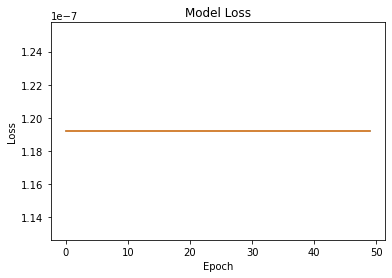

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

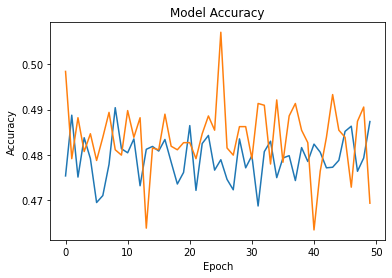

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [8]:
predictions = model.predict(validation_generator)
predictions_class = model.predict_classes(validation_generator)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [17]:
(model.predict(validation_generator) > 0.5).astype("int32")

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [9]:
predictions

array([[0.5014144 ],
       [0.50177205],
       [0.49890944],
       ...,
       [0.4988699 ],
       [0.49990198],
       [0.49792665]], dtype=float32)

In [10]:
predictions_class

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [11]:
test_loss, test_acc = model.evaluate(validation_generator, batch_size=50, verbose=1)

79/79 [==============================] - 57s 720ms/step - loss: 1.1921e-07 - accuracy: 0.4717


In [12]:
scores = model.evaluate_generator(validation_generator, steps=5)

Instructions for updating:
Please use Model.evaluate, which supports generators.


In [13]:
print("-- Evaluate --")
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 51.23%
